# Objetivo 
Predecir el beneficio del vino 

# Análisis descriptivo

In [2]:
#settings
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns",None)
#importar datos
vinos = pd.read_csv("C:\\Users\\Kim\\Desktop\\Máster\\mineria_datos\\Datos\\DatosVino.csv")
vinos.head()

,ID,Beneficio,Compra,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,2,515,1,0.16,-0.81,26.10,-0.425,1.02792,3.38,0.70,144.0,M,2,***,1.0,1.00
1,4,585,1,2.64,-0.88,14.80,0.037,0.99518,3.12,0.48,22.0,M,3,***,3.0,3.38
2,8,0,0,0.29,-0.40,21.50,0.060,0.99572,3.49,1.21,10.3,R,3,?,1.0,3.72
3,11,775,1,-1.22,0.34,1.40,0.040,1.03236,3.20,NaN,11.6,B,2,***,2.0,6.23
4,12,596,1,0.27,1.05,11.25,-0.007,0.99620,4.93,0.26,15.0,R,1,?,2.0,2.44


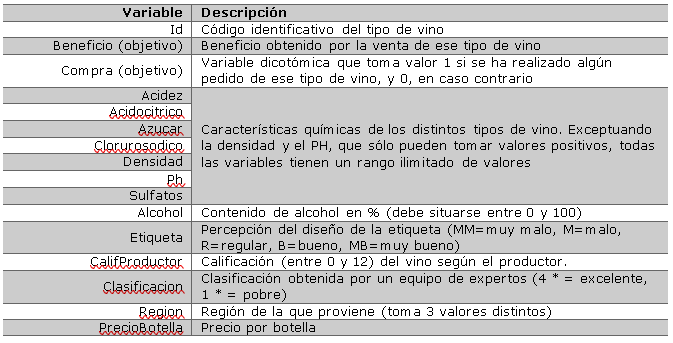

In [3]:
from IPython.display import Image
Image(filename='C:/Users/Kim/Desktop/Máster/mineria_datos/PARTE I_Depuracion y Regresiones/Dia1_MDDepuracion/datosVino.png')

In [4]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6365 non-null   int64  
 1   Beneficio       6365 non-null   int64  
 2   Compra          6365 non-null   int64  
 3   Acidez          6365 non-null   float64
 4   AcidoCitrico    6365 non-null   float64
 5   Azucar          6365 non-null   float64
 6   CloruroSodico   6066 non-null   float64
 7   Densidad        6365 non-null   float64
 8   pH              6170 non-null   float64
 9   Sulfatos        5761 non-null   float64
 10  Alcohol         6365 non-null   float64
 11  Etiqueta        6365 non-null   object 
 12  CalifProductor  6365 non-null   int64  
 13  Clasificacion   6365 non-null   object 
 14  Region          6258 non-null   float64
 15  PrecioBotella   6365 non-null   float64
dtypes: float64(10), int64(4), object(2)
memory usage: 795.8+ KB


In [9]:
vinos = vinos.set_index("ID")

In [10]:
vinos.nunique()

Beneficio          983
Compra               2
Acidez             659
AcidoCitrico       523
Azucar            1639
CloruroSodico     1406
Densidad          3614
pH                 436
Sulfatos           543
Alcohol            312
Etiqueta            10
CalifProductor      13
Clasificacion        5
Region               3
PrecioBotella      598
dtype: int64

In [11]:
#La columna Etiqueta debería de ser 5 y son 10 
vinos.Etiqueta.unique()

array(['M', 'R', 'B', 'b', 'MB', 'mm', 'r', 'm', 'MM', 'mb'], dtype=object)

In [14]:
vinos.Etiqueta = vinos.Etiqueta.str.upper().astype('category')
vinos.Etiqueta.nunique()

5

In [19]:
# Definir las variables categóricas
for column in vinos.columns:
    if vinos[column].nunique() <= 10:
         vinos[column] = vinos[column].astype('category')

"""Lista de columnas con menos de 10 valores distintos. Potenciales factores!"""
to_factor = list(vinos.loc[:,vinos.nunique() <= 10]);  

"""Podemos cambiar el tipo de todas ellas a factor de una vez"""
vinos[to_factor] = vinos[to_factor].astype('category')

In [24]:
vinos.loc?

### Distribución de las variables 

In [30]:
vinos.describe()

,Beneficio,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella
count,6365.000000,6365.000000,6365.000000,6365.000000,6066.000000,6365.000000,6170.000000,5761.000000,6365.000000,6365.000000,6365.000000
mean,452.380204,0.331214,0.314350,4718.669780,0.051348,0.994204,3.202207,0.526659,16.250102,2.761508,2.610652
std,308.380542,0.787534,0.861428,21192.546521,0.322715,0.026417,0.678330,0.948039,25.598217,1.319127,1.480274
min,0.000000,-2.790000,-3.240000,-127.100000,-1.171000,0.888090,0.540000,-3.120000,-4.500000,0.000000,1.000000
25%,236.000000,0.130000,0.020000,0.900000,-0.032750,0.988245,2.960000,0.280000,9.000000,2.000000,1.420000
50%,480.000000,0.280000,0.310000,5.000000,0.046000,0.994400,3.190000,0.500000,10.500000,3.000000,2.190000
75%,671.000000,0.650000,0.580000,22.600000,0.146750,1.000600,3.460000,0.880000,12.800000,3.000000,3.440000
max,1568.000000,3.680000,3.860000,99999.000000,1.351000,1.099240,6.050000,4.210000,150.000000,12.000000,11.440000


**Beneficio:**
- Media < Mediana (valores tirando por debajo)
- Cola larga

**Azucar**
- Cola extra extra larga



In [31]:
vinos.describe(exclude=np.number)

,Compra,Etiqueta,Clasificacion,Region
count,6365,6365,6365,6258.0
unique,2,5,5,3.0
top,1,R,**,3.0
freq,4998,2800,1754,2132.0


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(5,5), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """
    # Definir tamaño letra
    sns.set(font_scale=font_scale)
    # Crear ventana para los subgráficos
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    # Crear boxplot
    sns.boxplot(x=data, ax=ax_box2)
    # Crear histograma
    sns.histplot(x=data, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=data, ax=ax_hist2)
    # Pintar una línea con la media
    ax_hist2.axvline(np.mean(data),color='g',linestyle='-')
    # Pintar una línea con la mediana
    ax_hist2.axvline(np.median(data),color='y',linestyle='--')
    # Asignar título y nombre de eje si tal
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title, xlabel="")
    # Mostrar gráfico
    plt.show()
    
def cat_plot(col):
     if col.dtypes == 'category':
        fig = px.bar(col.value_counts())
        #fig = sns.countplot(x=col)
        return(fig.show())
def plot(col):
     if col.dtypes != 'category':
        print('Cont')
        histogram_boxplot(col, xlabel = col.name, title = 'Distibución continua')
     else:
        print('Cat')
        cat_plot(col)
        

Cont


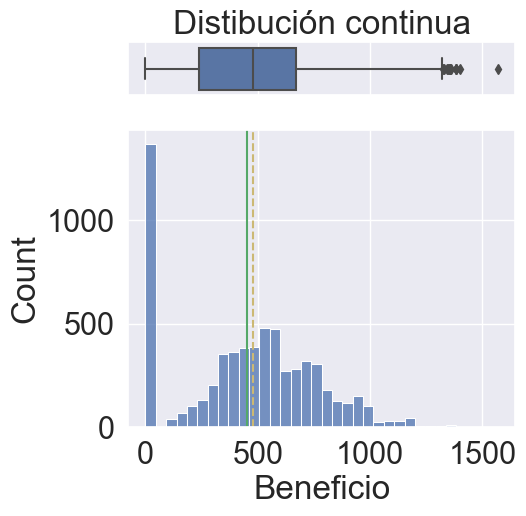

Cat


Cont


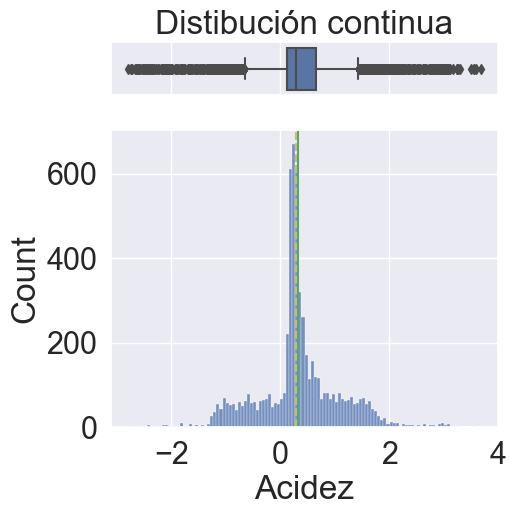

Cont


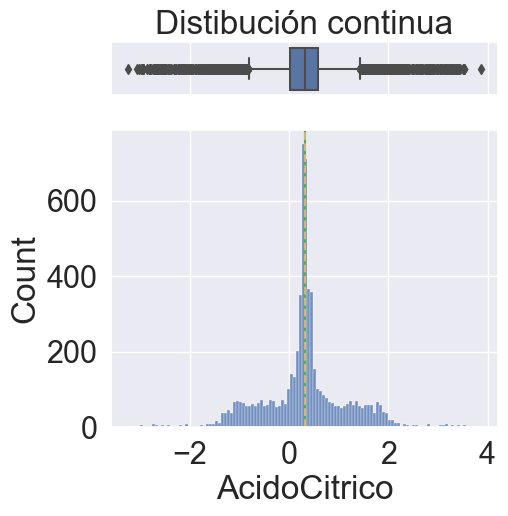

Cont


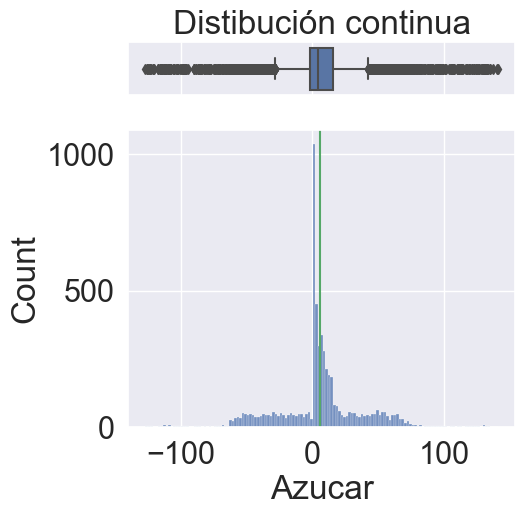

Cont


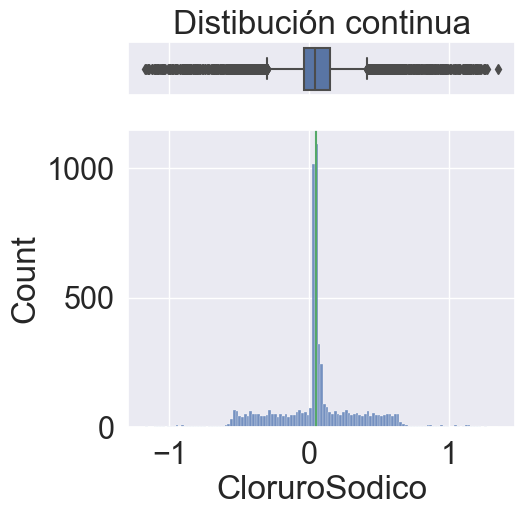

Cont


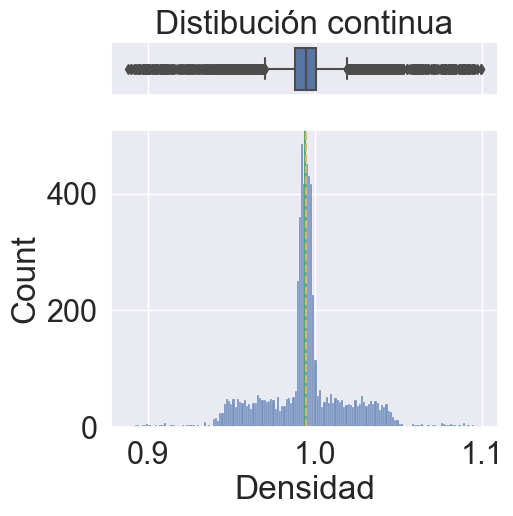

Cont


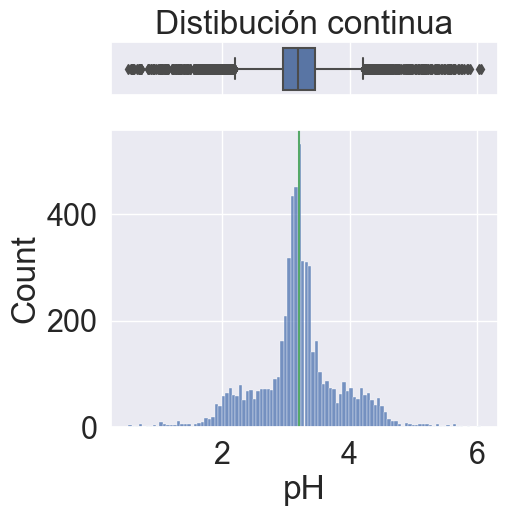

Cont


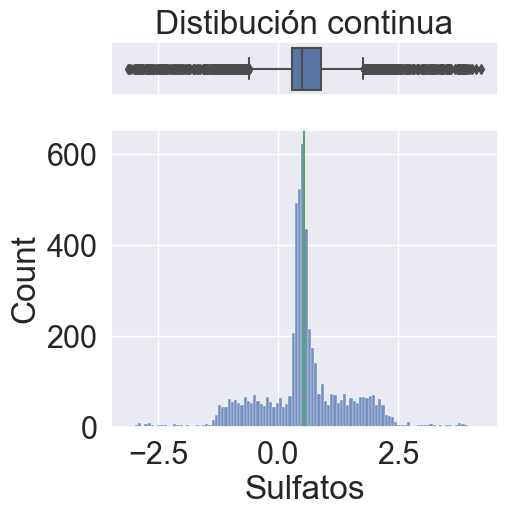

Cont


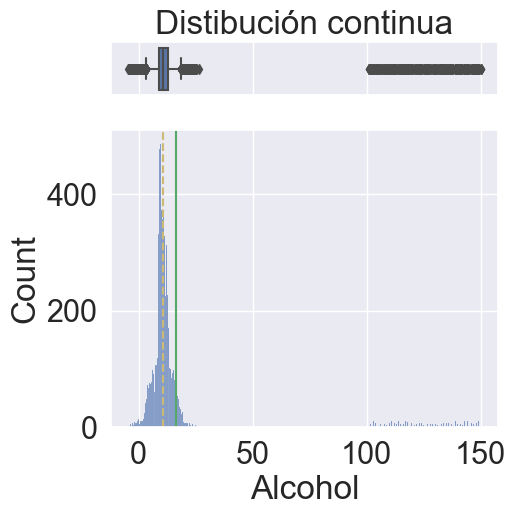

Cat


Cont


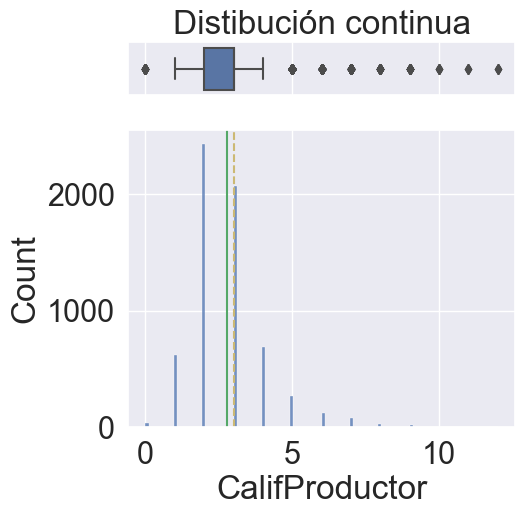

Cat


Cat


Cont


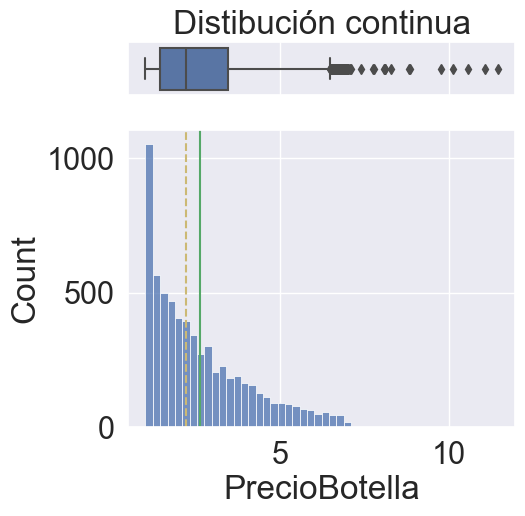

Beneficio         None
Compra            None
Acidez            None
AcidoCitrico      None
Azucar            None
CloruroSodico     None
Densidad          None
pH                None
Sulfatos          None
Alcohol           None
Etiqueta          None
CalifProductor    None
Clasificacion     None
Region            None
PrecioBotella     None
dtype: object

In [41]:
vinos.apply(plot)

Beneficio: Un montón de Beneficio 0 (Vinos que no se compran?)

Azúcar: ...

Alcohol: Max es 100, hay un montón que supera el max

CalifProductor: Agruparlas? 

Clasificación = "?"...

### Solucionar los problemas de codificación

In [47]:
#Efectivamente, cuando es beneficio 0 es porque no se ha comprado
pd.crosstab(index = vinos.Compra, columns = vinos.Beneficio)

Beneficio,0,101,104,105,108,109,111,112,114,115,116,117,122,123,125,126,127,128,129,130,131,132,133,134,135,136,137,139,141,143,144,145,146,147,148,149,150,151,152,156,157,158,159,160,162,163,164,166,167,168,169,170,171,172,173,174,175,178,179,180,181,182,186,187,188,190,191,192,194,195,196,199,200,201,202,203,204,206,207,209,210,211,212,213,214,215,216,217,218,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,236,237,238,239,240,241,242,243,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,811,812,813,814,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,898,899,900,901,902,903,905,906,907,908,909,911,912,913,914,915,916,917,918,919,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,984,985,987,988,989,990,991,992,993,994,995,996,997,998,999,1001,1003,1004,1005,1006,1009,1010,1012,1014,1018,1021,1022,1023,1026,1030,1034,1035,1036,1037,1039,1040,1041,1048,1050,1051,1054,1060,1062,1064,1066,1067,1070,1071,1074,1076,1077,1078,1079,1080,1082,1083,1084,1085,1086,1089,1092,1096,1097,1098,1105,1106,1107,1108,1110,1115,1118,1119,1123,1124,1126,1130,1131,1132,1134,1135,1138,1141,1142,1143,1144,1145,1148,1149,1153,1154,1155,1157,1161,1162,1163,1165,1166,1169,1172,1175,1176,1177,1178,1179,1180,1185,1186,1187,1188,1189,1190,1191,1192,1193,1195,1196,1198,1199,1212,1218,1238,1245,1247,1256,1266,1276,1293,1311,1315,1318,1320,

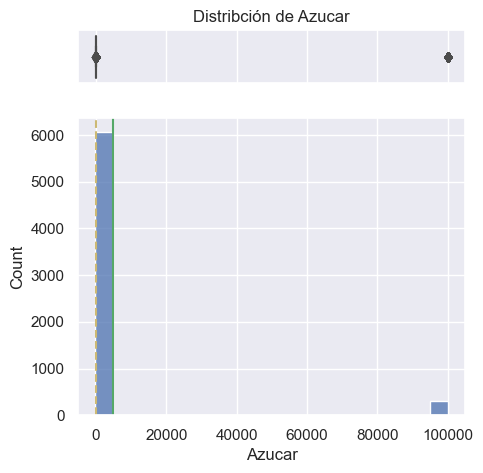

In [38]:
histogram_boxplot(vinos.Azucar, bins = 20, font_scale=1, title="Distribción de Azucar", figsize=(5,5))

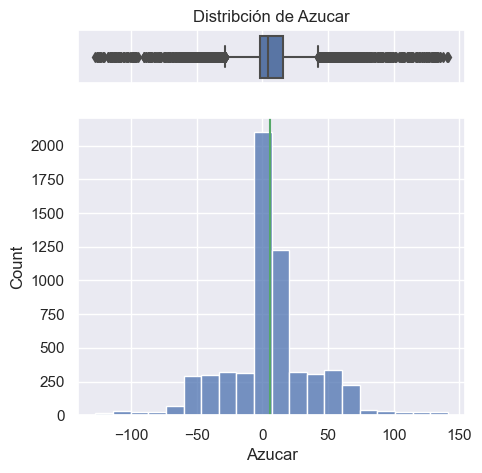

In [39]:
# Quitamos ese 99999 de la variable Azucar y lo pasamos a NA
vinos.Azucar.replace(99999,np.nan,inplace=True)

# Comprobamos el nuevo máximo
vinos.Azucar.max()
histogram_boxplot(vinos.Azucar, bins = 20, font_scale=1, title="Distribción de Azucar", figsize=(5,5))

0.0 26.5


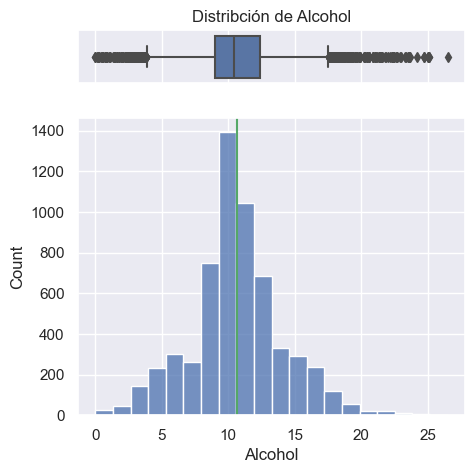

In [45]:
#Convertir a nan los valores que no estén entre 0 y 100
vinos.loc[~vinos.Alcohol.between(0,100), "Alcohol"]= np.nan
# Vector con el mínimo y máximo de alcohol 
print(vinos.Alcohol.min(),vinos.Alcohol.max())
# Visualizo 
histogram_boxplot(vinos.Alcohol, bins = 20, font_scale=1, title="Distribción de Alcohol", figsize=(5,5))

In [48]:
pd.crosstab(index = vinos.Compra, columns = vinos.Clasificacion)
#No me diche nada

Clasificacion,*,**,***,****,?
Compra,,,,,
0,306,46,0,0,1015
1,1229,1708,1074,322,665


In [49]:
pd.crosstab(index = vinos.CalifProductor, columns = vinos.Clasificacion)
#Tampoco me dice nada

Clasificacion,*,**,***,****,?
CalifProductor,,,,,
0,8,13,4,1,7
1,149,176,108,42,144
2,574,722,476,148,510
3,517,568,359,94,531
4,172,191,96,25,206
5,57,47,17,8,135
6,30,22,5,1,64
7,12,6,4,2,52
8,8,7,4,1,10


## Valores objetivo

In [52]:
var_obj_binaria = vinos.Compra
var_obj_continua = vinos.Beneficio

y = vinos.drop(["Compra", "Beneficio"], axis = 1)

## Valores atípicos 

#### Simetría

In [59]:
vinos.skew()

Beneficio         0.023872
Acidez            0.029079
AcidoCitrico     -0.024261
Azucar            0.022391
CloruroSodico     0.012041
Densidad         -0.009353
pH                0.003311
Sulfatos         -0.062373
Alcohol           0.267099
CalifProductor    1.663553
PrecioBotella     1.120795
dtype: float64

Variables asimétricas:
- CalifProductor    
- PrecioBotella  

In [55]:
## Función manual de winsor con clip+quantile 
def winsorize_with_pandas(s, limits):
    """
    s : pd.Series
        Series to winsorize
    limits : tuple of float
        Tuple of the percentages to cut on each side of the array, 
        with respect to the number of unmasked data, as floats between 0. and 1
    """
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))
## Función para gestionar outliers
def gestiona_outliers(col,clas = 'check'):
    
     print(col.name)
     # Distribución simétrica -> Rango Intercuartílico
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     # Distribución asimétrica -> Criterio de dispersión sobre la mediana
     else:
        criterio1 = abs((col-col.median ())/col.mad())>8
     
     # Calcular primer cuartil     
     q1 = col.quantile(0.25)  
     # Calcular tercer cuartil  
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR))
    
    # Contar los datos asimétricos tanto por arriba como por abajo
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
    
     # Salida se gún el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper)))
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)
        

In [58]:
y.select_dtypes(include=np.number).copy().apply(lambda column: gestiona_outliers(column))

Acidez
AcidoCitrico
Azucar
CloruroSodico
Densidad
pH
Sulfatos
Alcohol
CalifProductor
PrecioBotella


,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella
0,0.816968,0.848390,0.956307,0.807781,0.942655,0.794165,1.024128,0.000000,0.000000,0.0
1,0.879811,0.785546,0.972795,0.873722,0.942655,0.696921,0.815831,0.317885,0.094266,0.0
2,1.696779,1.633936,1.929101,1.681503,1.885310,1.491086,1.839958,0.317885,0.094266,0.0


In [60]:
variables_continuas = y.select_dtypes(include=np.number).copy()

In [61]:
# Decido winsorizarlas porque no hay muchos outliers
vinos_winsor = variables_continuas.apply(lambda column: gestiona_outliers(column, clas='winsor'))

Acidez
AcidoCitrico
Azucar
CloruroSodico
Densidad
pH
Sulfatos
Alcohol
CalifProductor
PrecioBotella


In [62]:
# Unir las winsorizadas con las categóricas
y_winsor = vinos_winsor.join(y.select_dtypes(exclude=np.number))

## Valores perdidos

In [66]:
#Proporción de missings por variable 
y_winsor.apply(lambda column: column.isna().sum()/column.count()*100)

Acidez             0.000000
AcidoCitrico       0.000000
Azucar             4.946414
CloruroSodico      4.929113
Densidad           0.000000
pH                 3.160454
Sulfatos          10.484291
Alcohol            6.491551
CalifProductor     0.000000
PrecioBotella      0.000000
Etiqueta           0.000000
Clasificacion      0.000000
Region             1.709811
dtype: float64

In [68]:
#Proporción de missings por observación (como una nueva columna del dataset)
y_winsor['prop_missings'] = y_winsor.apply(lambda x: x.isna().sum()/x.count()*100,axis=1)


In [71]:
# Valoramos distribución
y_winsor.prop_missings.describe()

count    6365.000000
mean        2.534790
std         4.635380
min         0.000000
25%         0.000000
50%         0.000000
75%         8.333333
max        30.000000
Name: prop_missings, dtype: float64

In [72]:
y_winsor.sort_values(by='prop_missings', ascending=False).head()

,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella,Etiqueta,Clasificacion,Region,prop_missings
ID,,,,,,,,,,,,,,
6990,1.40,0.30,NaN,NaN,1.04263,4.00,NaN,15.1,3,1.30,R,**,2.0,30.0
3341,0.26,0.27,18.2,0.048,1.04227,NaN,NaN,3.8,1,2.62,B,**,NaN,30.0
13598,-0.45,0.26,NaN,NaN,0.99907,2.21,0.68,NaN,3,3.10,M,?,1.0,30.0
11020,0.27,-0.01,NaN,0.295,0.99566,NaN,-0.46,NaN,3,2.35,R,**,2.0,30.0
3357,1.02,1.51,NaN,NaN,0.99300,3.37,0.55,11.5,2,1.60,MB,?,NaN,30.0


#### Patrones de missings? 

<AxesSubplot: >

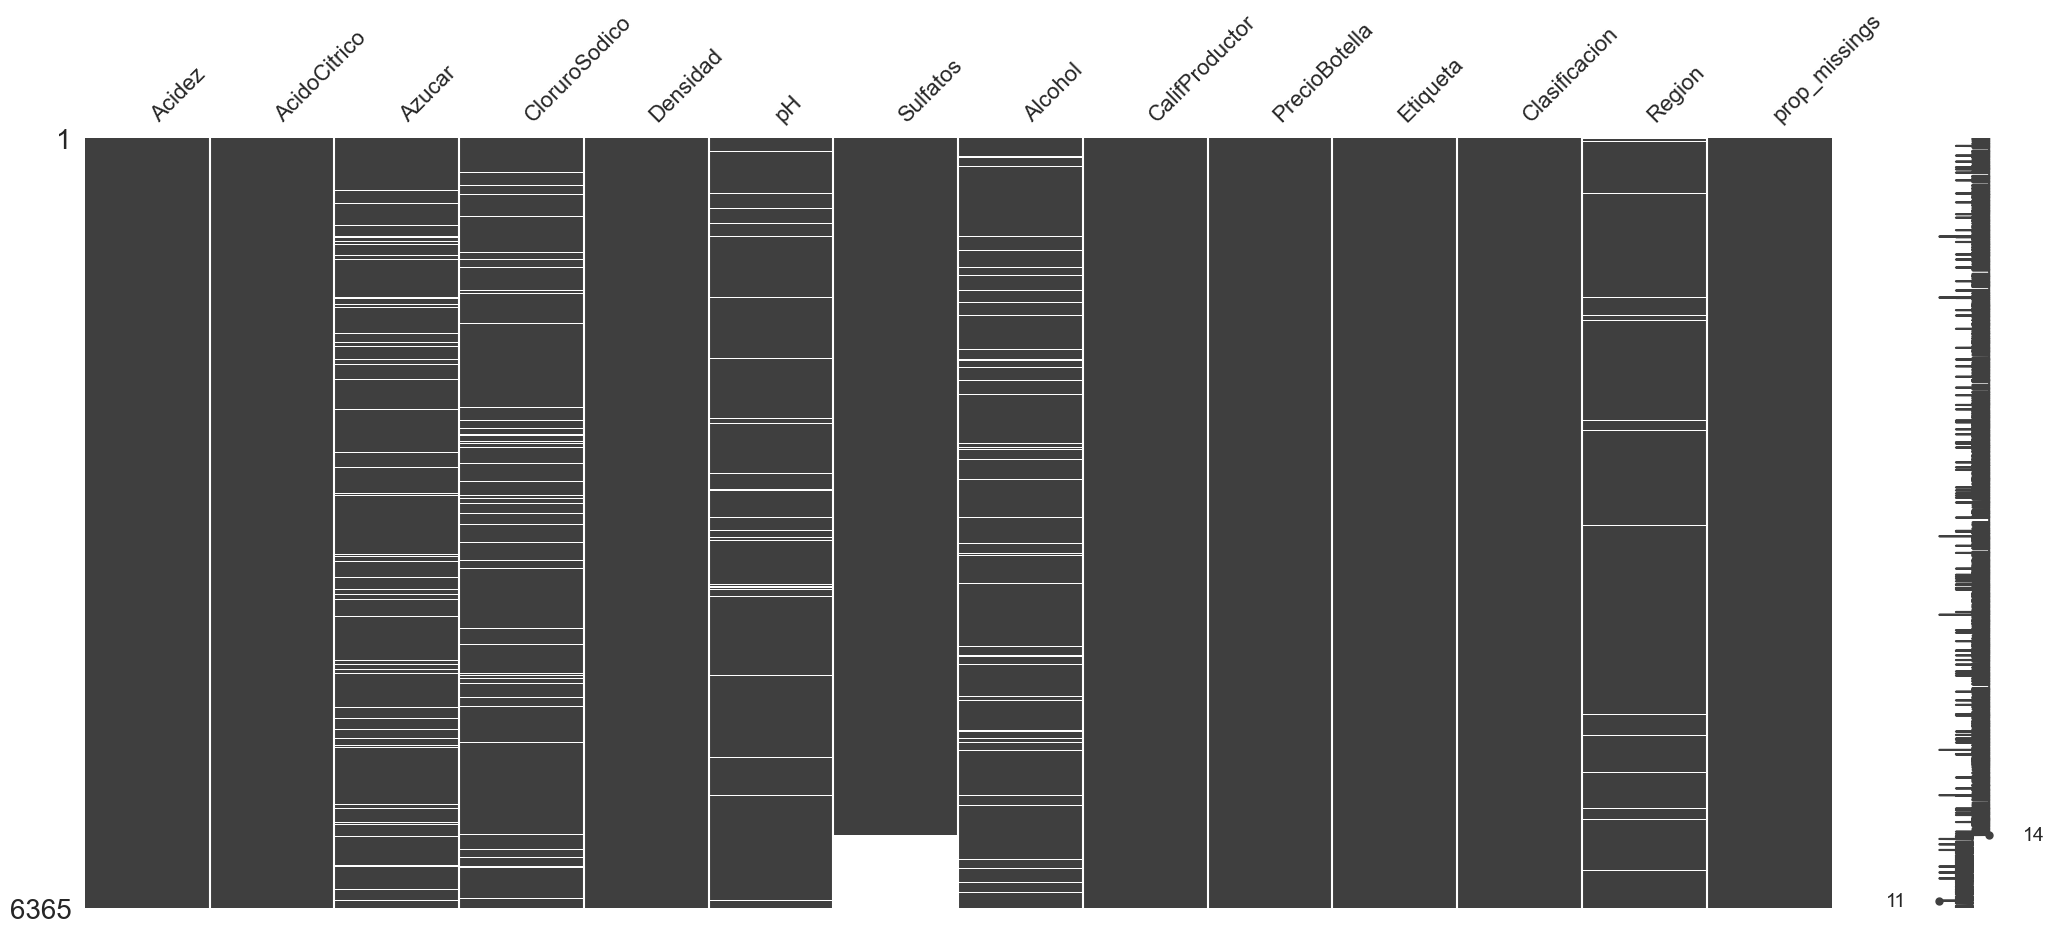

In [73]:
import missingno as msno 
msno.matrix(y_winsor.sort_values(by='Sulfatos'))

<AxesSubplot: >

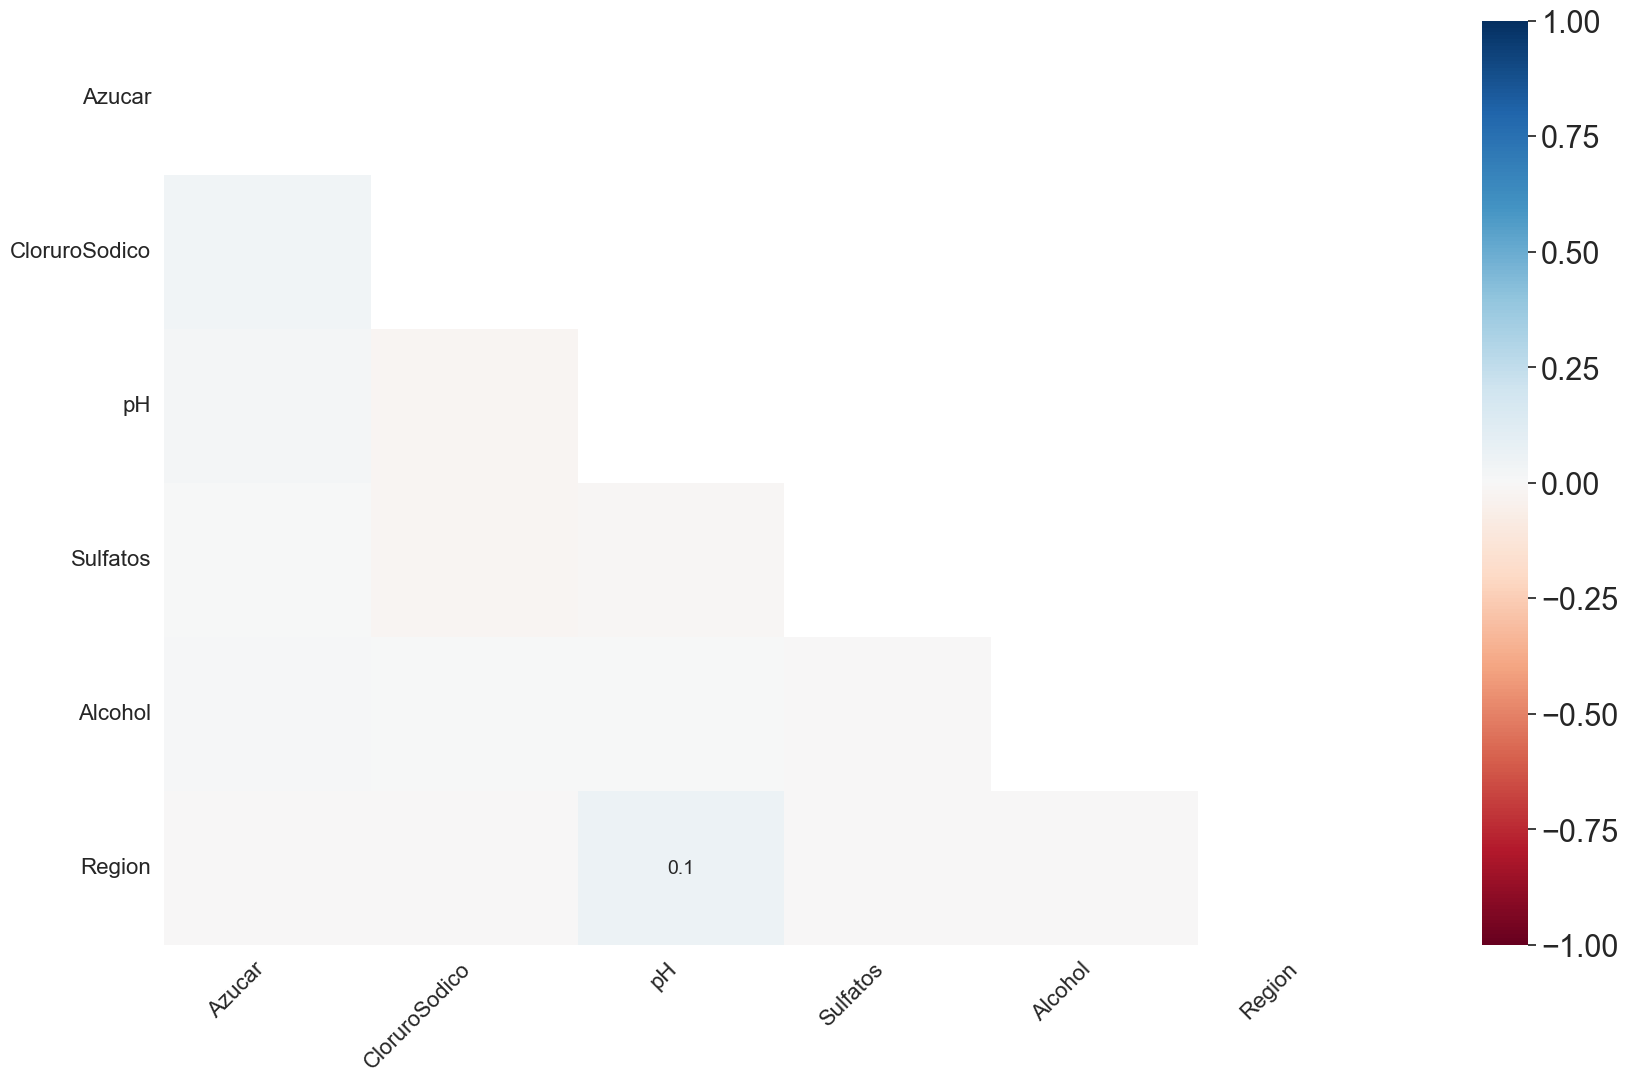

In [75]:
msno.heatmap(y_winsor)

[0-1] No hay patrones significativos

#### Elimino o imputo? 

In [93]:
print("El {} % de las filas tienen campos nulos".format(100-(y_winsor.dropna().shape[0]/y_winsor.shape[0])*100))

El 26.284367635506683 % de las filas tienen campos nulos


In [ ]:
# Imputo
import sklearn.impute as skl_imp
from sklearn.experimental import enable_iterative_imputer
import feature_engine.imputation as fe_imp

# Moda: Solo nominales
imputer_moda = skl_imp.SimpleImputer(strategy='most_frequent', missing_values=np.nan)

# knn: Solo numéricas
imputer_knn = skl_imp.KNNImputer(n_neighbors=3)

# Chain equations: solo numéricas, modelo de regresión
imputer_itImp = skl_imp.IterativeImputer(max_iter=10, random_state=0)

# Aleatoria: numéricas y nominales
imputer_rand = fe_imp.RandomSampleImputer()

# Mediana: solo numéricas
imputer_median = fe_imp.MeanMedianImputer(imputation_method='median')

# Media: solo nominales
imputer_mean = fe_imp.MeanMedianImputer(imputation_method='mean')